1_ Load Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
2_ Load Data Set & Display all data Queries

In [2]:
df = pd.read_csv("insurance.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3_ Check the Null Values


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

4_ Value Counts

In [5]:
print(df['sex'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


5_ Check Through Some Visualization

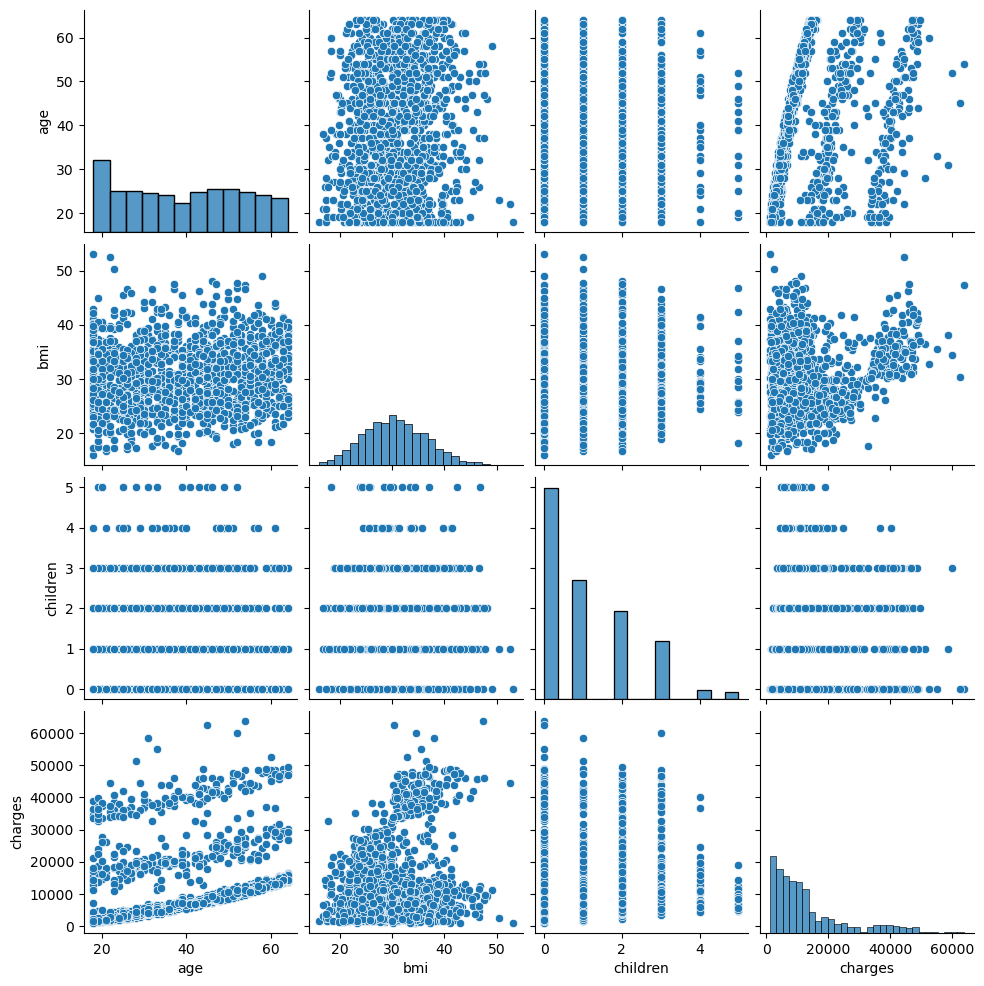

In [6]:
sns.pairplot(df)

6_ Checking Categorical data & Preprocessing

NOTE : SINCE WE HAVE THREE COLUMNS WITH OBJECT SO MACHINE LEARNING MODEL ONLY UNDERSTAND NUMERICAL DATA SO WE USE ENCODING

In [7]:


le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])


7_ STandard Scaling

NOTE: since the remining integer column have some scaling value to get perfect prediction we scale this column

In [8]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


8_ TRAIN TEST AND SPLIT

In [10]:
X = df.drop("charges", axis=1)
y=df['charges']


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)



In [12]:
scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

9_Linear Regression

In [13]:
lr =LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

Prediction

In [14]:
y_pred_lr = lr.predict(X_test)

print("📌 Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("="*50)

📌 Linear Regression:
R2 Score: 0.7833463107364538
MSE: 33635210.43117842
RMSE: 5799.587091438357


Polynomial Transformation

In [15]:
poly = PolynomialFeatures(degree=2)
X_p_train=poly.fit_transform(X_train)
X_p_test=poly.fit_transform(X_test)

In [16]:
poly_model =LinearRegression()
poly_model.fit(X_p_train,y_train)

LinearRegression()

In [23]:
y_pred_poly = poly_model.predict(X_p_test)

print("📌 Polynomial Regression (degree=2):")
print("R2 Score:", r2_score(y_test, y_pred_poly)*100)
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("="*50)

📌 Polynomial Regression (degree=2):
R2 Score: 86.7756671853774
MSE: 20530608.94295192
RMSE: 4531.0715005340535


Lasso Regression

In [18]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("📌 Lasso Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("="*50)


📌 Lasso Regression:
R2 Score: 0.7833196898308832
MSE: 33639343.29299942
RMSE: 5799.94338705124


Comparsion of Actual and Predicted

In [24]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_poly
})
comparison_df.head(10) 

,Actual,Predicted
0,9095.06825,11180.057949
1,5272.17580,6571.376483
2,29330.98315,34066.038436
3,9301.89355,10340.246206
4,33750.29180,29435.501347
5,4536.25900,4497.677274
6,2117.33885,3501.304744
7,14210.53595,15878.012047
8,3732.62510,3871.058977
9,10264.44210,11677.495033


ACCTUAL ACCURACY OF MODEL

In [25]:
accuracy_percent = r2_score(y_test, y_pred_poly) * 100
print(f"Model Accuracy: {accuracy_percent:.2f}%")


Model Accuracy: 86.78%


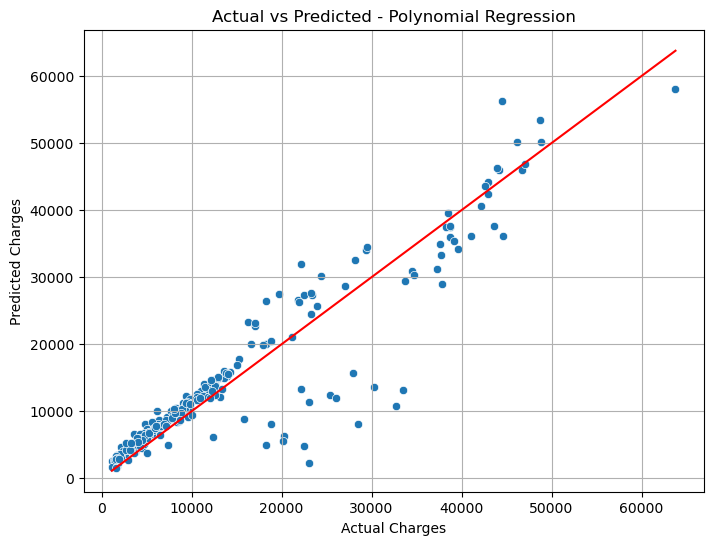

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Polynomial Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.grid(True)
plt.show()
